In [3]:
import os; os.chdir('..')

In [4]:
import os
#import shutil
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
# import tensorflow_text as text
import seaborn as sns
from pylab import rcParams

import matplotlib.pyplot as plt
tf.get_logger().setLevel('ERROR')

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
import warnings
warnings.filterwarnings("ignore")

ImportError: cannot import name 'dnn_logit_fn_builder' from partially initialized module 'tensorflow_estimator.python.estimator.canned.dnn' (most likely due to a circular import) (/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/canned/dnn.py)

In [ ]:
import pandas as pd
dataset= pd.read_csv("data/keyword_intent.csv")
dataset.sample(5)

,keyword,intent
124,Google maps,Navigational
338,"What is the meaning of ""carpe diem""?",Informational
1047,What is the theory of relativity?,Informational
1043,Why do we yawn when others yawn?,Informational
826,Lakes for fishing in Minnesota,Local


In [ ]:
model_name= "bert-base-cased"

In [ ]:
from transformers import AutoTokenizer
tokenizer= AutoTokenizer.from_pretrained(model_name)


In [ ]:
dataset.shape

(1071, 2)

In [ ]:
train_features= dataset.copy()
train_labels= train_features.pop("intent")

In [ ]:
train_features[:5]

,keyword
0,citalopram vs prozac
1,who is the oldest football player
2,t mobile town east
3,starbucks
4,tech crunch


In [ ]:
train_labels[:5]

0       Commercial
1    Informational
2     Navigational
3     Navigational
4     Navigational
Name: intent, dtype: object

In [ ]:
train_features=train_features.values

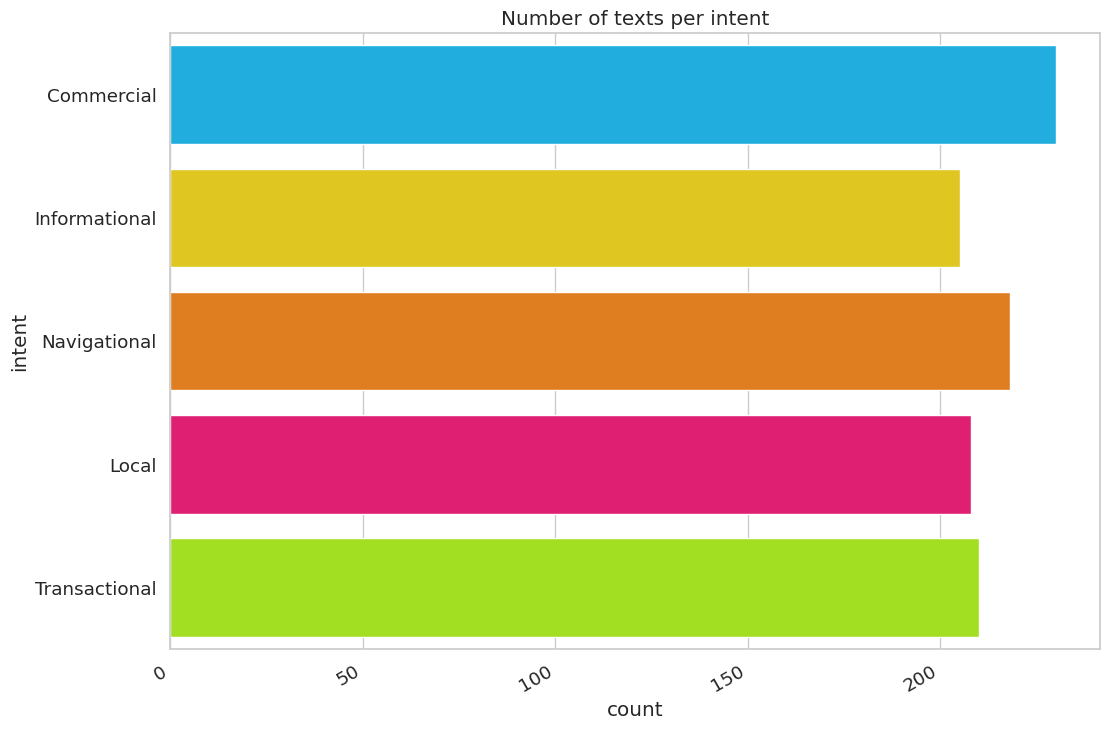

In [ ]:
chart = sns.countplot(train_labels, palette=HAPPY_COLORS_PALETTE)
plt.title("Number of texts per intent")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
binarizer=LabelBinarizer()
trainlabels=binarizer.fit_transform(train_labels.values)

In [ ]:
train_labels.values

array(['Commercial', 'Informational', 'Navigational', ...,
       'Informational', 'Informational', 'Informational'], dtype=object)

In [ ]:
trainlabels[:10]

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [ ]:
train_labels[:10]

0       Commercial
1    Informational
2     Navigational
3     Navigational
4     Navigational
5       Commercial
6            Local
7     Navigational
8    Informational
9    Transactional
Name: intent, dtype: object

In [ ]:
train_features[:10]

array([['citalopram vs prozac'],
       ['who is the oldest football player'],
       ['t mobile town east'],
       ['starbucks'],
       ['tech crunch'],
       ['screen protector'],
       ['chinese food delivery near me'],
       ['elevenlabs'],
       ['llama'],
       ['tire patch kit']], dtype=object)

In [ ]:
trainlabels.shape

(1071, 5)

In [ ]:
bert_model_name = 'small_bert/bert_en_uncased_L-8_H-512_A-8' 
bert_model_name = 'small_bert/bert_en_uncased_L-2_H-256_A-4' 
# bert_model_name = 'bert_en_cased_L-12_H-768_A-12' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/2',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/2',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/2',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

2023-11-03 06:08:42.654778: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-03 06:08:43.152942: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-03 06:08:43.156121: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

RuntimeError: Op type not registered 'CaseFoldUTF8' in binary running on ip-172-31-83-118. Make sure the Op and Kernel are registered in the binary running in this process. Note that if you are loading a saved graph which used ops from tf.contrib (e.g. `tf.contrib.resampler`), accessing should be done before importing the graph, as contrib ops are lazily registered when the module is first accessed.

In [ ]:
train_features[0]

array(['citalopram vs prozac'], dtype=object)

In [ ]:
text_test = train_features[0]
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

2023-11-03 06:01:50.133021: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


Keys       : ['input_type_ids', 'input_mask', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [  101 25022  9080  7361  6444  5443  4013  4143  2278   102     0     0]
Input Mask : [1 1 1 1 1 1 1 1 1 1 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1
Pooled Outputs Shape:(1, 256)
Pooled Outputs Values:[ 0.96222544 -0.08875032 -0.81703     0.98973316  0.15995139  0.99921507
 -0.9241757   0.21457167 -0.08768604 -0.01272145  0.995151   -0.9101431 ]
Sequence Outputs Shape:(1, 128, 256)
Sequence Outputs Values:[[-1.2998540e+00 -1.2321087e+00  1.2776703e+00 ... -2.5951114e-01
   6.3638955e-01 -2.1045504e+00]
 [-2.0476754e+00 -2.7968657e+00  5.5422062e-01 ...  4.6021318e-01
   2.3247730e-03 -2.0032413e+00]
 [-1.7296954e+00 -1.7673944e+00  1.1839350e+00 ... -1.2995134e-01
  -2.3531258e-02 -2.4836648e+00]
 ...
 [-1.3939043e+00 -1.2325684e+00  7.0103890e-01 ... -5.9216964e-01
   7.4340510e-01 -1.2987194e+00]
 [-1.3378991e+00 -2.4040134e+00  1.5945940e-01 ...  7.9506412e-02
   6.2780154e-01 -1.8510027e+00]
 [-6.2388808e-01 -1.9758480e+00  2.4423353e-01 ... -1.6493499e-01
   2.5632832e-02 -1.7210202e+00]]


In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  # net = tf.keras.layers.Dense(7, activation=None, name='classifier')(net)
  # net = tf.keras.layers.Dense(5, activation=None, name='classifier')(net)
  net = tf.keras.layers.Dense(5, activation=tf.keras.activations.softmax, name='classifier')(net)
  
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(train_features[0]))
print(tf.keras.activations.softmax(bert_raw_result))

tf.Tensor([[0.16367392 0.16617931 0.16623233 0.30538645 0.19852795]], shape=(1, 5), dtype=float32)


In [ ]:
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                              

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = tf.metrics.CategoricalAccuracy()

In [ ]:
epochs=40
optimizer=tf.keras.optimizers.Adam(1e-5)
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                        
                         metrics=metrics)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_features,y=trainlabels,
                            #    validation_data=(validfeatures,validlabels),
                            validation_split=0.4,
                            shuffle=True,
                               batch_size=32,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1
Epoch 1/40


2023-11-03 06:02:06.089804: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f72a413f9e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-03 06:02:06.089842: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2023-11-03 06:02:06.105074: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-03 06:02:06.516892: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:435] Loaded runtime CuDNN library: 8.5.0 but source was compiled with: 8.6.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2023-11-03 06:02:06.519684: W tensorf

FailedPreconditionError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_40 defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code

  File "/tmp/ipykernel_1507/4018538603.py", line 2, in <module>

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1783, in fit

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1377, in train_function

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1360, in step_function

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1349, in run_step

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1130, in train_step

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/ubuntu/SEO_IntentGeneration/venv/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node Adam/StatefulPartitionedCall_40}}]] [Op:__inference_train_function_46311]

In [ ]:
loss, accuracy = classifier_model.evaluate(train_features,trainlabels)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

 1/34 [..............................] - ETA: 5s - loss: 0.3763 - categorical_accuracy: 0.8438

34/34 [==============================] - 5s 132ms/step - loss: 0.6131 - categorical_accuracy: 0.7871
Loss: 0.6131154298782349
Accuracy: 0.7871148586273193


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


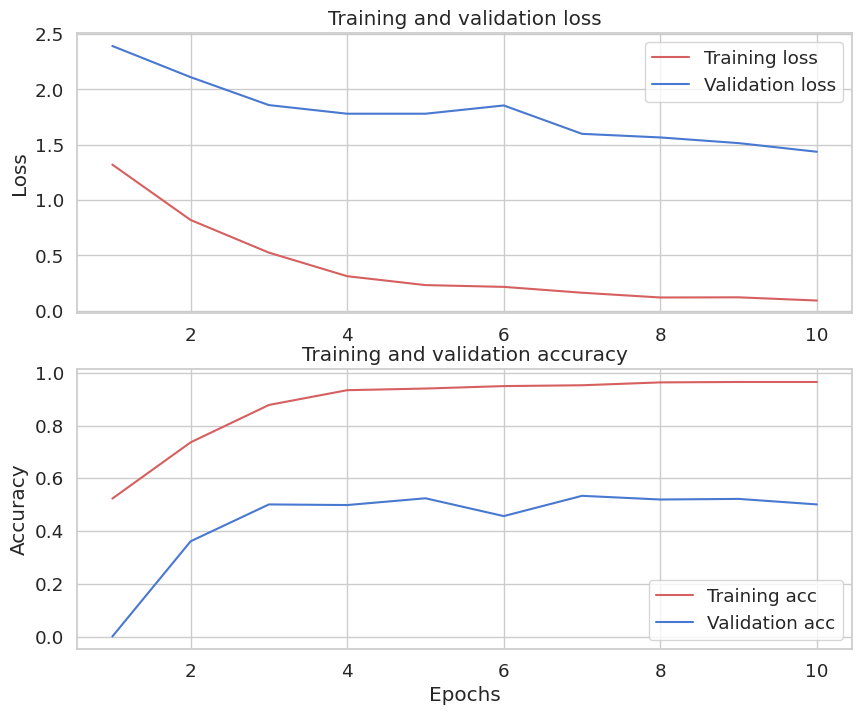

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 8))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.grid(True)
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
import keras
new_model = keras.models.clone_model(classifier_model)

In [ ]:
new_model.save("models/intent_classifier.h5", save_format='h5')

In [ ]:
type(new_model)

keras.src.engine.functional.Functional

# Inference 

In [ ]:
# import os; os.chdir('..')


In [ ]:
# # import tensorflow as tf
# from keras.models import load_model

# model= load_model("models/intent_classifier.h5") # ValueError: Unknown layer: 'KerasLayer'

In [ ]:
# my_reloaded_model = tf.keras.models.load_model(
#        ("models/intent_classifier.h5"),
#        custom_objects={'KerasLayer':hub.KerasLayer}
# )

In [ ]:
# train_features[0]

In [ ]:
# import numpy

In [ ]:
# bert_preprocess_model(numpy.array(["Chinese Food Shops near me"]))

In [ ]:
# my_reloaded_model.predict()